# **Sentiment Analysis on the IMDB movie reviews**

## **Context**

Movie reviews help users decide whether a movie is worth watching or not. A summary of the reviews for a movie can help a user make quick decisions within a small period of time, rather than spending much more time reading multiple reviews for a movie. Sentiment analysis helps in rating how positive or negative a movie review is. Therefore, the process of understanding if a review is positive or negative can be automated as the machine learns different techniques from the domain of Natural Language Processing.

## **Objective**

The dataset contains 10,000 movie reviews. The objective is to do Sentiment Analysis(positive/negative) for the movie reviews using Deep Learning Sequential model Long short term Memory (LSTM) different techniques and observe the accurate results.


## **Data Dictionary**
- **review:** reviews of the movies.
- **sentiment:** indicates the sentiment of the review 0 or 1( 0 is for negative review and 1 for positive review)        

## **Importing the libraries**

In [5]:
#!pip install wordcloud

In [1]:
# Importing the required the libraries
import numpy as np
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

import wordcloud
# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading the dataset**

In [2]:
# Loading data into pandas dataframe
#reviews = pd.read_csv("/content/drive/MyDrive/cleaned_reviews.csv")
reviews = pd.read_csv("imdb_10K_sentimnets_reviews.csv")

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [4]:
# Creating the copy of the data frame
data = reviews.copy()

## **Overview of the dataset**

**View the first and last 2 rows of the dataset**

In [5]:
data.head(2)

,review,sentiment
0,"Okay, I know this does'nt project India in a good light. But the overall theme of the movie is not India, it's Shakti. The power of a warlord, and the power of a mother. The relationship between Nandini and her husband and son swallow you up in their warmth. Then things go terribly wrong. The interaction between Nandini and her father in law - the power of their dysfunctional relationship - and the lives changed by it are the strengths of this movie. Shah Rukh Khan's performance seems to be a mere cameo compared to the believable desperation of Karisma Kapoor. It is easy to get caught up in the love, violence and redemption of lives in this film, and find yourself heaving a sigh of relief and sadness at the climax. The musical interludes are strengths, believable and well done.",1
1,"Despite John Travolta's statements in interviews that this was his favorite role of his career, ""Be Cool"" proves to be a disappointing sequel to 1995's witty and clever ""Get Shorty.""<br /><br />Travolta delivers a pleasant enough performance in this mildly entertaining film, but ultimately the movie falls flat due to an underdeveloped plot, unlikeable characters, and a surprising lack of chemistry between leads Travolta and Uma Thurman. Although there are some laughs, this unfunny dialog example (which appeared frequently in the trailers) kind of says it all: Thurman: Do you dance? Travolta: Hey, I'm from Brooklyn.<br /><br />The film suggests that everyone in the entertainment business is a gangster or aspires to be one, likening it to organized crime. In ""Get Shorty,"" the premise of a gangster ""going legitimate"" by getting into movies was a clever fish-out-of water idea, but in ""Be Cool,"" it seems the biz has entirely gone crooked since then.<br /><br />The film is interestingly casted and the absolute highlight is a ""monolgue"" delivered by The Rock, whose character is an aspiring actor as well as a goon, where he reenacts a scene between Gabrielle Union and Kirsten Dunst from ""Bring It On."" Vince Vaughan's character thinks he's black and he's often seen dressed as a pimp-- this was quite funny in the first scene that introduces him and gets tired and embarrassing almost immediately afterward.<br /><br />Overall, ""Be Cool"" may be worth a rental for John Travolta die-hards (of which I am one), but you may want to keep your finger close to the fast forward button to get through it without feeling that you wasted too much time. Fans of ""Get Shorty"" may actually wish to avoid this, as the sequel is devoid of most things that made that one a winner. I rate this movie an admittedly harsh 4/10.",0


In [6]:
data.tail(2)

,review,sentiment
9998,"I was so disappointed by this show. After hearing and reading all the hoopla about it, how it was a ""ground breaking show"" and all sorts of wild promises if quality, I tried to watch it.<br /><br />What a letdown!! The acting was way forced and exaggerated. The story made very little sense. As for any hint of the vaunted ""look into teenagers' lives"", I could only see a paltry attempt that had as much reality to it as a reality show.<br /><br />Some are wondering why there are so many negative comments about this show. The reason is that it's really not all that good and beating the drums over quality on this show only serves to attract attention to how poorly made it is.",0
9999,"The 3-D featured in ""The Man Who Wasn't There"" stands for DUMB, DUMB, DUMB! This inept comedy features lousy 3-D effects that makes the 3-D effects in ""Jaws 3"", ""Amityville 3"", and ""Friday the 13th Part 3"" look better by comparison. Not to mention the movie is asinine to the extreme. This was one of many 1983 movies to feature the pop-off-the-screen effects. Steve Guttenberg and Jeffrey Tambor got trapped in this mess, but at least it didn't kill their careers. Tambor would go on to star on HBO's ""The Larry Sanders Show"" and Ron Howard's box office smash ""How the Grinch Stole Christmas"", while Guttenberg followed this flop with ""Police Academy"" and ""Cocoon"". What them in those projects instead of them here in ""The Man Who Wasn't There"". If you do, you'll regret it.<br /><br />1/2* (out of four)",0


* Here, a sentiment value of **0 is negative**, and **1 represents a positive sentiment.**

### **Understand the shape of the dataset**

In [7]:
# Print shape of data
data.shape               

(10000, 2)

### **Check the data types of the columns for the dataset**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


**Observations:**

* Data has 10000 rows and 2 columns.
* Both the columns are object type.
* There are no null values present in the dataset.

### **Checking for duplicate values**

In [9]:
# checking for duplicate values
data.duplicated().sum()

18

* There are no duplicate values present in the data since we are using the cleaned data from week 1.

## **Exploratory Data Analysis**

**Word Cloud for cleaned Negative Reviews**

In [10]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = data[data['sentiment'] == 0]

# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['review']) 

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()]) 

In [11]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word) # The generate() function takes one argument of the text we created, helps to generate the wordcloud


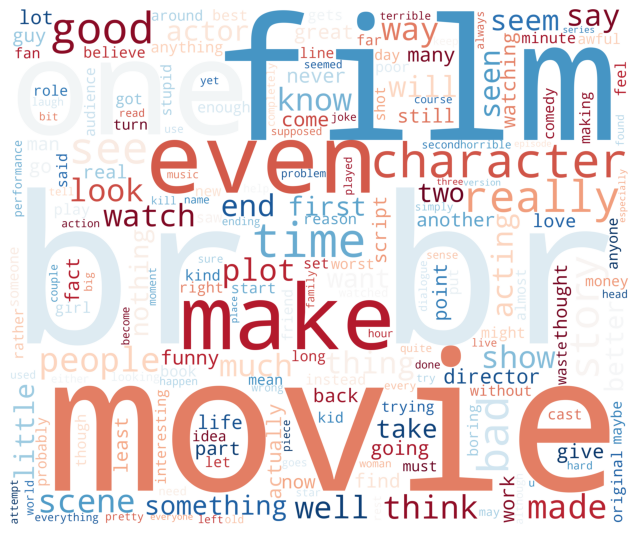

In [13]:
plt.figure(1, figsize = (8, 8))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* The **even, bad, never, little, least, maybe, instead, waste, still, boring** were some of the important recurring words observed in the negative reviews.

**Word Cloud for cleaned Positive Reviews**

In [14]:
# Creating word cloud for positive reviews

positive_reviews = data[data['sentiment'] == 1]
# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(positive_reviews['review'])
# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

In [15]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word) # The generate() function takes one argument of the text we created, helps to generate the wordcloud

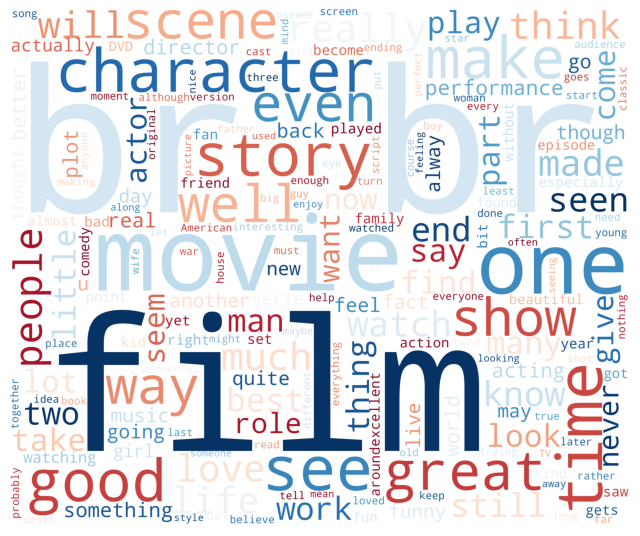

In [16]:
plt.figure(1, figsize = (8, 8))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

 **Character,story, well, good, best, great, scene,enjoy, interesting, wonderful** were some of the important words observed in the positive reviews

In [17]:
# check the count of each labels
data['sentiment'].value_counts()    

1    5037
0    4963
Name: sentiment, dtype: int64

We can observe that classes are balanced.

In [19]:
!pip install keras

     ---------------------------------------- 1.7/1.7 MB 3.8 MB/s eta 0:00:00


In [22]:
#pip install tensorflow

In [23]:
# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Used to create the Sequential model
from keras.models import Sequential
import tensorflow
# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

### **Tokenizing and converting the reviews into numerical vectors**

In [24]:
# Creating the tokenizer with 700 vocab size
tokenizer = Tokenizer(num_words = 700, split = ' ') 

tokenizer.fit_on_texts(data['review'].values)

# converting text to sequences
X = tokenizer.texts_to_sequences(data['review'].values)

# Padding the sequences
X = pad_sequences(X)

**Model Building**

In [25]:
model = Sequential()

# model will take as input an integer matrix of size (batch, input_length), and the largest integer (i.e. word index) in the input
# should be no larger than vocabulary size. Now model.output_shape is (None, input_length, 256), where `None` is the batch dimension.
# input_length is X_data[1] = 700 here.
model.add(Embedding(700, 120, input_length = X.shape[1]))

model.add(SpatialDropout1D(0.2))# dropping some values to decrease chances of over-fitting

 # return_sequences = True means each LSTM cell in it is outputting its value.The output of the layer is a sequence of outputs.
model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Dense(2, activation = 'softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1715, 120)         84000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 1715, 120)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 150)               162600    
                                                                 
 dense (Dense)               (None, 2)                 302       
                                                                 
Total params: 246,902
Trainable params: 246,902
Non-trainable params: 0
_________________________________________________________________
None


A sequential model is constructed by adding various layers to it.

- The first layer is the Embedding layer which transforms one-hot encoded sparse vectors into Word Embedding vectors. As the model continues to train, the weights of the Embedding layer are adjusted so that words with similar meanings are located closer together in the vector space, or have similar Word Embedding Vectors. For example, "orange" would be located near "tangerine" and "queen" would be near "empress." The vocabulary size is specified.

- The subsequent layer is an LSTM layer with 150 neurons. The input for this layer is a list of sentences, where each word has been converted to its corresponding Embedding vector and padded to have the same length. The activation function used is ReLU, which is widely used, but other relevant activation functions can also be used.

- To prevent bias, a dropout layer is employed to regulate the network.

- The final layer is a Dense layer which serves as the output layer and has 2 cells to perform classification, representing the 2 different categories in this example.

- The model is then compiled using the Adam optimizer and categorical cross-entropy. The Adam optimizer is currently the best choice for handling sparse gradients and noisy problems, and categorical cross-entropy is typically used when the classes are mutually exclusive, meaning each sample belongs to exactly one class.

**Splitting the Data**

In [27]:
# creating the target feature
y = pd.get_dummies(data['sentiment']) # why use get_dummies when this feature is already a 0 or 1?

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Training the model**

In [1]:
# specifying the batch size 
batch_size = 32

# fitting the model on the training data with 10 epochs
#his = model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 'auto')

**Plotting the model**

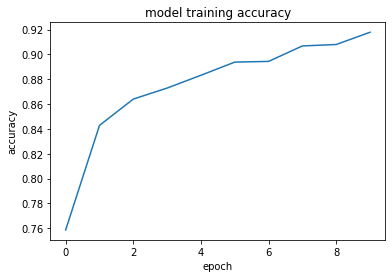

In [ ]:
# accessing the accuracy from the his variable
plt.plot(his.history['accuracy'])
# setting the title 
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

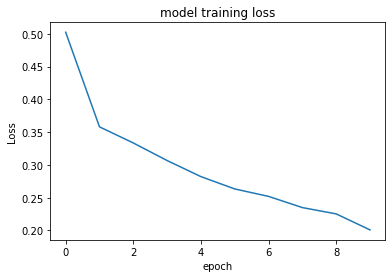

In [ ]:
# accessing the loss from the his variable
plt.plot(his.history['loss'])
# setting the title
plt.title('model training loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

**Observations:**
- We can observe from the above graphs that the accuracy is got improved from the 0.75 to 0.91 in 10 epochs.
- The training loss got reduced from the 0.50 to 0.20.

**Evaluating the model on the test data**

In [ ]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 15s 151ms/step - loss: 0.5624 - accuracy: 0.8017


[0.5623504519462585, 0.8016694784164429]

In [ ]:
ypred = model.predict(X_test)

94/94 [==============================] - 14s 149ms/step


In [ ]:
ypred

array([[0.822777  , 0.17722297],
       [0.34752357, 0.6524765 ],
       [0.17279705, 0.827203  ],
       ...,
       [0.19177353, 0.8082264 ],
       [0.99795794, 0.002042  ],
       [0.02011055, 0.97988945]], dtype=float32)

- The models is giving around 80% accuracy on the test data

In [ ]:
# saving the model
model.save("/content/drive/MyDrive/model.h5")

##**Conclusion**

- In terms of accuracy, LSTM outperforms models such as Vader and TextBlob. However, the result is nearly identical to that of TF-IDF.
- And, there is usually a trade-off between accuracy and computation.LSTM is good at remembering previous text sequences, and combining it with pretrained Word Embeddings like Word2Vec, GLoVe, and others can produce good sentiment analysis results.But training the model takes much longer than normal Supervised learning Algorithms like Random Forest using TF-IDF.
